In [4]:
!pip install tensorflow

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


In [10]:
# Load the dataset
df = pd.read_csv('train.csv')

# Separate the labels and the pixel data
labels = df['label'].values
pixels = df.drop('label', axis=1).values


In [12]:
# Normalize pixel values (0-255) to (0-1)
pixels = pixels / 255.0

# Reshape to 28x28 images (and add a channel dimension for CNN input)
pixels = pixels.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=10)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)


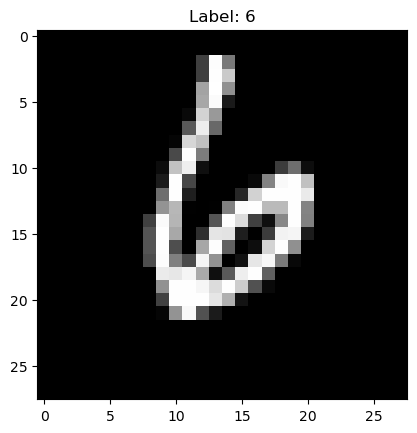

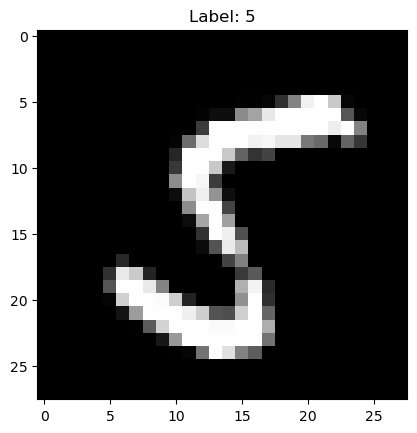

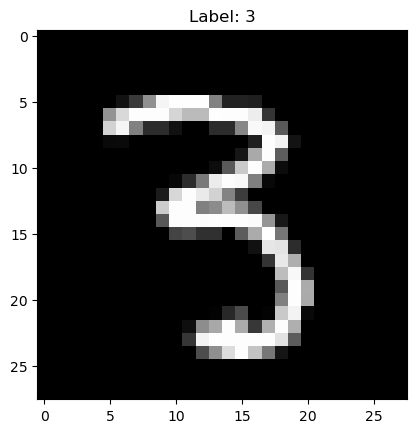

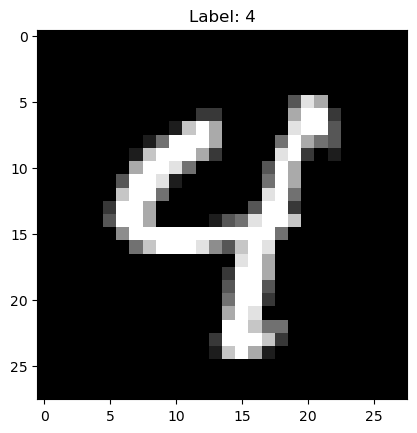

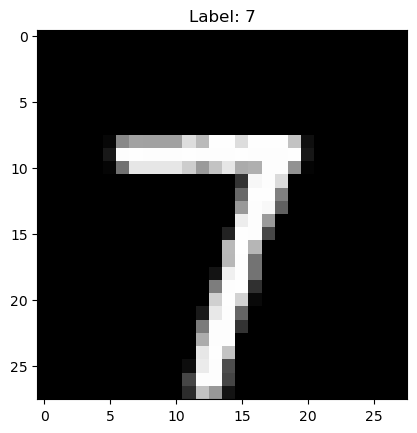

In [16]:
# Display the first 5 images
for i in range(5):
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {np.argmax(y_train[i])}')
    plt.show()


In [18]:
model = models.Sequential()

# Input layer (28x28x1 images)
model.add(layers.Input(shape=(28, 28, 1)))

# First convolutional layer (32 filters, 3x3 kernel size)
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer (64 filters)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the 3D output to 1D for fully connected layers
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 nodes (for the 10 digit classes 0-9)
model.add(layers.Dense(10, activation='softmax'))

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=5, 
                    validation_data=(X_test, y_test))


Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8727 - loss: 0.4269 - val_accuracy: 0.9775 - val_loss: 0.0780
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9801 - loss: 0.0631 - val_accuracy: 0.9811 - val_loss: 0.0572
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9883 - loss: 0.0395 - val_accuracy: 0.9838 - val_loss: 0.0467
Epoch 4/5
 986/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9912 - loss: 0.0300